<a href="https://colab.research.google.com/github/TamaraBe/bootcamp-dg/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

A EducaTech é uma startup de educação digital que oferece cursos online na área de negócios.
Fundada há seis meses, a empresa tem como missão democratizar o acesso ao conhecimento de qualidade por meio de plataformas acessíveis e interativas.
Apesar do pouco tempo de operação, a empresa já alcançou todos os estados do Brasil, com centenas de alunos ativos que representam a totalidade da base
de usuários até o momento.
A equipe multidisciplinar composta por profissionais de produto, dados e pedagogia está empenhada em compreender como o engajamento dos alunos influencia
o desempenho final nos cursos, com o objetivo de melhorar a experiência educacional e aumentar a taxa de conclusão dos cursos.

Para essa base de dados, a empresa utilizou os dados coletados diretamente da sua plataforma de ensino.
Cada vez que um aluno acessa o sistema, suas interações são registradas em tempo real e elas foram coletadas no dia 31 de maio de 2025.
Além disso, algumas informações do cadastro do cliente foram acrescentadas para analisar possíveis perfis.

# Objetivo:

 - Analise dataset (estrutura)
 - Análise Univariada e Bivariada

# 1. Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 2. Carregando Dataset

In [ ]:
alunos = pd.read_excel('C:\\Bootcamp_DG\\Datasets\\tabela_educatech.xlsx')

**- Visualizar as primeiras linhas e verificar informações sobre a estrutura do dataset**   
*Transformei os nomes das colunas em letra minuscula*

In [ ]:
alunos.head()

,index,ID_Aluno,Ultimo_acesso,Ano_mes_ultimo_acesso,Ano_ultimo_acesso,Tempo_Sessao_Minutos,Numero_Modulos_Completos,Nota_Final_Curso,Tipo_Plano,Regiao_Aluno,Nivel_Interesse_Conteudo,Frequencia_Acessos_Semanal,Dispositivo_Acesso
0,0,A0001,2025-04-06,2025/04,2025,42.31,3,96.0,Premium,Sudeste,1,7,Desktop
1,1,A0002,2025-02-28,2025/02,2025,50.01,8,76.1,Básico,Norte,5,7,Mobile
2,2,A0003,2025-02-28,2025/02,2025,35.22,7,40.9,Básico,Nordeste,4,3,Desktop
3,3,A0004,2025-02-17,2025/02,2025,45.99,6,72.2,Gratuito,Nordeste,5,7,Mobile
4,4,A0005,2025-04-09,2025/04,2025,52.51,8,82.0,Premium,Sudeste,3,7,Desktop


In [ ]:
alunos.columns = alunos.columns.str.lower()

In [ ]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       125 non-null    int64         
 1   id_aluno                    125 non-null    object        
 2   ultimo_acesso               125 non-null    datetime64[ns]
 3   ano_mes_ultimo_acesso       125 non-null    object        
 4   ano_ultimo_acesso           125 non-null    int64         
 5   tempo_sessao_minutos        125 non-null    float64       
 6   numero_modulos_completos    125 non-null    int64         
 7   nota_final_curso            125 non-null    float64       
 8   tipo_plano                  125 non-null    object        
 9   regiao_aluno                125 non-null    object        
 10  nivel_interesse_conteudo    125 non-null    int64         
 11  frequencia_acessos_semanal  125 non-null    int64         

# 3. Análise Univariada

- Variáveis quantitativas discretas

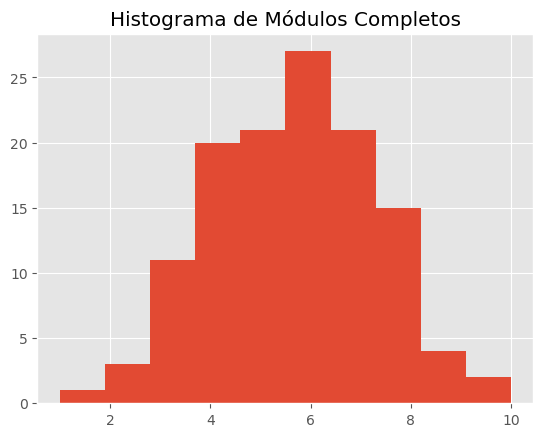

In [ ]:
_ = plt.hist(alunos.numero_modulos_completos)
_ = plt.title("Histograma de Módulos Completos")

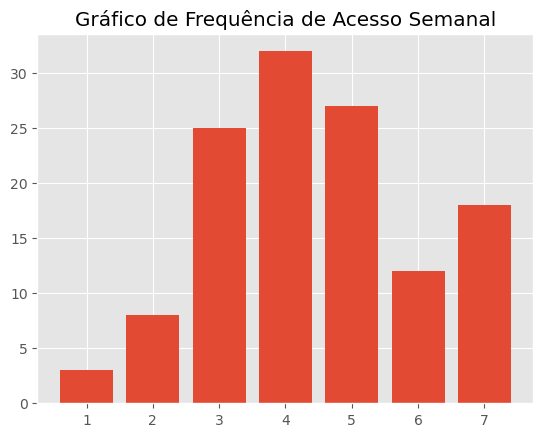

In [ ]:
frequencia = alunos.frequencia_acessos_semanal.value_counts()

_ = plt.bar(frequencia.index, frequencia.values)
_ = plt.title("Gráfico de Frequência de Acesso Semanal")


In [ ]:
media_freq = alunos.frequencia_acessos_semanal.mean()
mediana_freq = alunos.frequencia_acessos_semanal.median()
quartil1 = alunos.frequencia_acessos_semanal.quantile(0.25)
quartil2 = alunos.frequencia_acessos_semanal.quantile(0.50)
quartil3 = alunos.frequencia_acessos_semanal.quantile(0.75)

contagem = alunos.frequencia_acessos_semanal.value_counts()
soma = contagem.sum()
print(contagem)


print(f" Média de Frequência de Acesso Semanal: {media_freq}")
print(f" Mediana de Frequência de Acesso Semanal: {mediana_freq}")
print(f" Quartil 25%:  {quartil1} (25% da base acessou até {quartil1} vezes na semana)")
print(f" Quartil 50%:  {quartil2} (50% da base acessou até {quartil2} vezes na semana)")
print(f" Quartil 75%:  {quartil2} (75% da base acessou até {quartil3} vezes na semana)")

frequencia_acessos_semanal
4    32
5    27
3    25
7    18
6    12
2     8
1     3
Name: count, dtype: int64
 Média de Frequência de Acesso Semanal: 4.44
 Mediana de Frequência de Acesso Semanal: 4.0
 Quartil 25%:  3.0 (25% da base acessou até 3.0 vezes na semana)
 Quartil 50%:  4.0 (50% da base acessou até 4.0 vezes na semana)
 Quartil 75%:  4.0 (75% da base acessou até 5.0 vezes na semana)


- Variáveis Quantitativas Contínuas

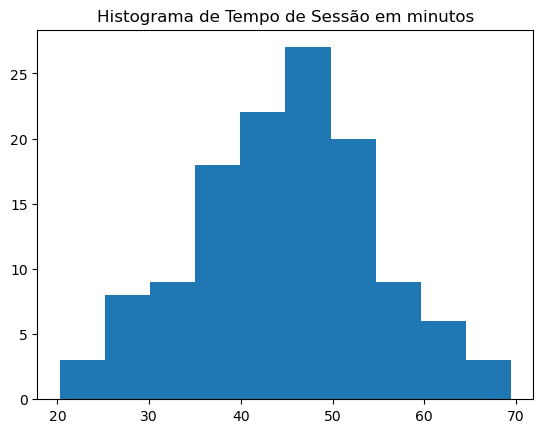

In [ ]:
_ = plt.hist(alunos.tempo_sessao_minutos)
_ = plt.title("Histograma de Tempo de Sessão em minutos")

- Variáveis Qualitativas Nominais

In [ ]:
df_contagem = (
    alunos['dispositivo_acesso']
    .value_counts()
    .rename_axis('Dispositivo de Acesso')    # passa o nome ao índice
                # transforma em DataFrame com coluna “Contagem”
    .reset_index(name='Contagem')
)
print(df_contagem.to_string(index=False))

Dispositivo de Acesso  Contagem
               Mobile        59
              Desktop        50
               Tablet        16


In [ ]:
alunos.regiao_aluno.value_counts

regiao_aluno
Sudeste         60
Nordeste        34
Sul             20
Centro-Oeste     6
Norte            5
Name: count, dtype: int64

In [ ]:
alunos.regiao_aluno.value_counts(1)

regiao_aluno
Sudeste         0.480
Nordeste        0.272
Sul             0.160
Centro-Oeste    0.048
Norte           0.040
Name: proportion, dtype: float64

In [ ]:
df_tipoplano = (
    alunos['tipo_plano']
    .value_counts()
    .rename_axis('Tipo de Planos')
    .reset_index(name='Contagem')
)
print(df_tipoplano.to_string(index=False))

Tipo de Planos  Contagem
      Gratuito        53
       Premium        36
        Básico        36


# 4. Análise Bivariada

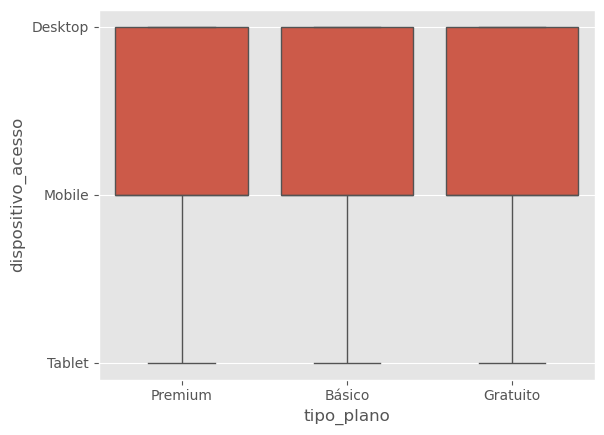

In [ ]:
_ = sns.boxplot(x='tipo_plano',y='dispositivo_acesso', data=alunos)


https://www.youtube.com/watch?v=9n9bFWWBkLg